In [47]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch 
import pandas as pd

## load data

In [48]:
housevalue = fch() 
X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看
X.columns = housevalue.feature_names
y = housevalue.target

In [49]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)
#恢复索引
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

## modeling

In [50]:
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest) #预测我们的yhat

In [51]:
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.4373589305968397),
 ('HouseAge', 0.01021126829449399),
 ('AveRooms', -0.10780721617317643),
 ('AveBedrms', 0.6264338275363766),
 ('Population', 5.216125353231469e-07),
 ('AveOccup', -0.003348509646333584),
 ('Latitude', -0.4130959378947724),
 ('Longitude', -0.42621095362084704)]

## model evaluation

In [52]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat, Ytest)

0.5309012639324571

In [53]:
error_list = cross_val_score(reg, X, y, cv=10, scoring="neg_mean_squared_error")
print(error_list.mean())
print(error_list)

-0.5509524296956596
[-0.48922052 -0.43335865 -0.8864377  -0.39091641 -0.7479731  -0.52980278
 -0.28798456 -0.77326441 -0.64305557 -0.3275106 ]


In [54]:
from sklearn.metrics import r2_score
r2_score(y_pred=yhat, y_true=Ytest)

0.6043668160178817

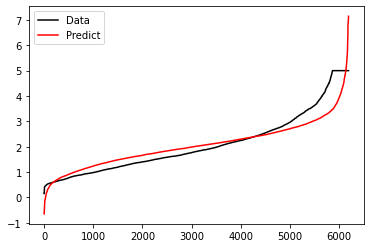

In [55]:
import matplotlib.pyplot as plt
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

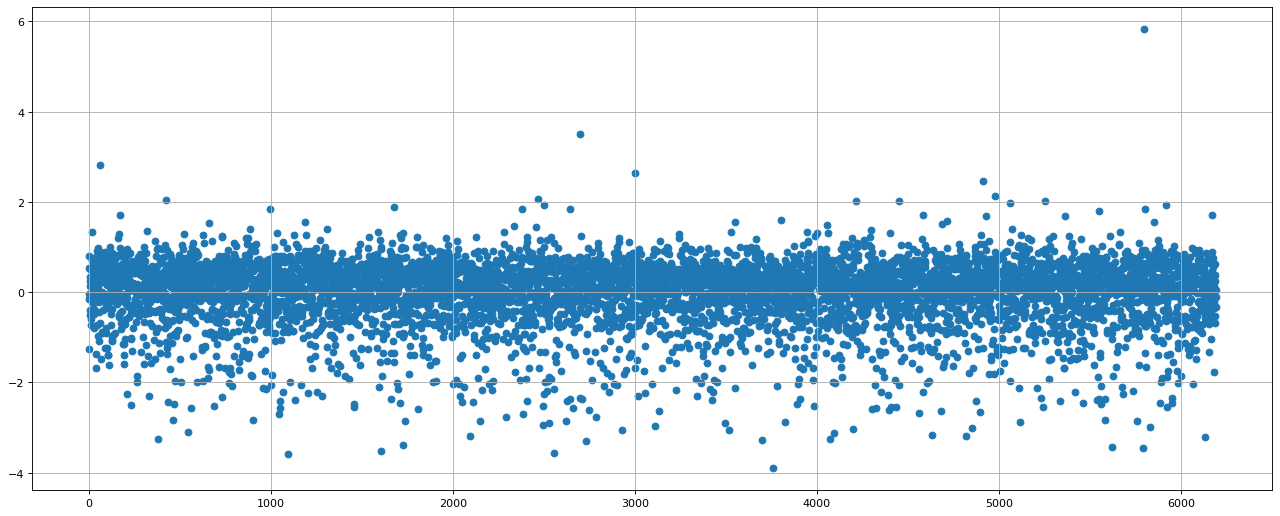

In [61]:
res = yhat-Ytest
x = range(len(res))
plt.figure(figsize=(20, 8), dpi=80)
plt.grid()
plt.scatter(x, res)
plt.show()